Daniel Arthur Notebook

In [1]:
#Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import file as a variable and take a basic look at the data contained
tmdbmovies= pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdbmovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
#turn the column into a list that can be used for graph
vote_count=tmdbmovies['vote_count']
vote_count_list=[]
for num in vote_count:
    vote_count_list.append(num)


In [20]:
#turn the column into a list that can be used for graph
popularity=tmdbmovies['popularity']
popularity_list=[]
for num in popularity:
    popularity_list.append(num)
popularity_list[0:5]

[33.533, 28.734, 28.515, 28.005, 27.92]

Text(0, 0.5, 'Popularity')

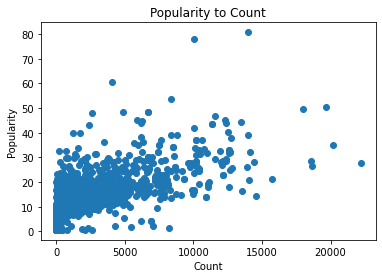

In [21]:
#plot production budget against domestic gross
fig, (ax) = plt.subplots()
ax.scatter(vote_count_list, popularity_list)
ax.set_title('Popularity to Count')
ax.set_xlabel('Count')
ax.set_ylabel('Popularity')

In [22]:
count_corr=np.corrcoef(vote_count_list, popularity_list)
count_corr

array([[1.        , 0.69484937],
       [0.69484937, 1.        ]])

There is a positive correlation between vote counts and popularity. Meaning that the more a movie is enjoyed (described by the popularity metric) the more people consume it. However we are unable to assume causation. So it is unclear if the popularity drives the count or if the counts drive the popularity. Are people deciding or are group dynamics driving indiviual opinion?

In [6]:
#Import file as a variable and take a basic look at the data contained
tnmovie_budgets= pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tnmovie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The tnmovie_budgets file provides the information I am useing for my analysis.

In [7]:
#turn the column into a list that can be used for graph
Production_budget=tnmovie_budgets['production_budget']
production_budget_list=[]
for num in Production_budget:
    a= num.replace(',','')
    b= a.replace('$','')
    production_budget_list.append(int(b))
mean_budget=sum(production_budget_list)/len(production_budget_list)

In [8]:
#turn the column into a list that can be used for graph
worldwide_gross= tnmovie_budgets['worldwide_gross']
worldwide_gross_list=[]
for num in worldwide_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    worldwide_gross_list.append(int(b))
mean_worldwide_gross= sum(worldwide_gross_list)/ len(worldwide_gross_list)

In [9]:
#turn the column into a list that can be used for graph
domestic_gross= tnmovie_budgets['domestic_gross']
domestic_gross_list=[]
for num in domestic_gross:
    a= num.replace(',','')
    b= a.replace('$','')
    domestic_gross_list.append(int(b))
mean_domestic_gross= sum(domestic_gross_list)/len(domestic_gross_list)

Text(0, 0.5, 'Domestic_Gross')

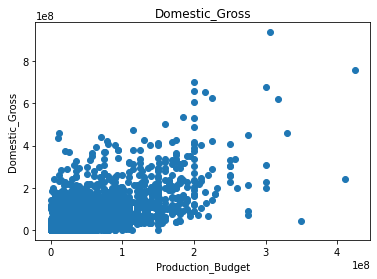

In [10]:
#plot production budget against domestic gross
fig, (ax) = plt.subplots()
ax.scatter(production_budget_list, domestic_gross_list)
ax.set_title('Domestic_Gross')
ax.set_xlabel('Production_Budget')
ax.set_ylabel('Domestic_Gross')

(0.0, 2000000000.0)

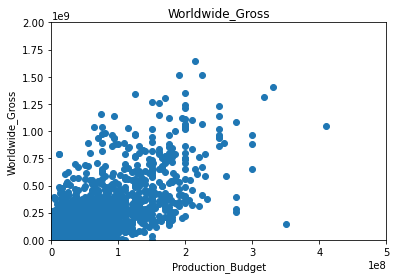

In [11]:
#plot production budget against worldwide gross
fig, (ax) = plt.subplots()
ax.scatter(production_budget_list, worldwide_gross_list)
ax.set_title('Worldwide_Gross')
ax.set_xlabel('Production_Budget')
ax.set_ylabel('Worldwide_Gross')
ax.set_xlim(0, 500000000)
ax.set_ylim(0, 2000000000)

In [12]:
#find how correlated budget is to domestic gross
cor_var_domestic=np.corrcoef(production_budget_list, domestic_gross_list)
cor_var_domestic

array([[1.        , 0.68568184],
       [0.68568184, 1.        ]])

In [13]:
#find how correlated budget is to worldwide gross
cor_var_worldwide=np.corrcoef(production_budget_list, worldwide_gross_list)
cor_var_worldwide

array([[1.        , 0.74830598],
       [0.74830598, 1.        ]])

The more money one spends the more they recieve in returns. There is little increased value after spending 20 mil. Investing has more payback on global market than a domestic market (there is a higher correlation; .74830598 to .68568184)